In [1]:
## Let's Import All Necessery Libraries
import numpy as np
import pandas as pd
import PIL
import cv2
from PIL import Image
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator,load_img,img_to_array,array_to_img
from keras.layers import Dense,Dropout,Flatten,BatchNormalization
from keras.layers import Flatten, MaxPooling2D,Conv2D
from keras.models import load_model,Sequential
from keras.callbacks import ModelCheckpoint,EarlyStopping

Text(0.5, 0, 'PNEUMONIA')

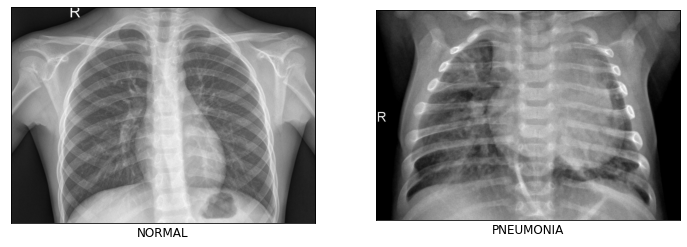

In [ ]:
## Let's visualize two images one from PNEUMONIA and another from Normal
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
img1=cv2.imread("chest_xray/test/NORMAL/IM-0001-0001.jpeg")
img1=cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)
plt.xticks([])
plt.yticks([])
plt.imshow(img1)
plt.xlabel("NORMAL",fontsize=12)
plt.subplot(1,2,2)
img2=cv2.imread("chest_xray/test/PNEUMONIA/person100_bacteria_475.jpeg")
img2=cv2.cvtColor(img2,cv2.COLOR_BGR2RGB)
plt.xticks([])
plt.yticks([])
plt.imshow(img2)
plt.xlabel("PNEUMONIA",fontsize=12)

In [ ]:
## Let's see the shape of our image
img1.shape

(1317, 1857, 3)

In [ ]:
img2.shape

(762, 1106, 3)

In [ ]:
train_generator=ImageDataGenerator(rescale=1/255.0,horizontal_flip=True,
                   brightness_range=[0.9,1.3],zoom_range=[0.9,1.2])
test_generator=ImageDataGenerator(rescale=1/255.0)
val_generator=ImageDataGenerator(rescale=1/255.0)

In [ ]:
train_data=train_generator.flow_from_directory("chest_xray/train",class_mode="binary",target_size=(128,128))
test_data=test_generator.flow_from_directory("chest_xray/test",class_mode="binary",target_size=(128,128),shuffle=False)
val_data=val_generator.flow_from_directory("chest_xray/val",class_mode="binary",target_size=(128,128))

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In [22]:
optimizers=["adam","rmsprop","sgd","adamax"]
layers=[[16,32,64],[16,32,64,128],[32,64,64,128,128],[16,32,64,64,128],[16,32,64,128,128]]
activations_functions=["relu","linear","sigmoid"]
drop_outs=[0.1,0.2,0.3,0.4]

In [9]:
import itertools

In [23]:
list(itertools.product(*[optimizers,layers,activations_functions,drop_outs]))

[('adam', [16, 32, 64], 'relu', 0.1),
 ('adam', [16, 32, 64], 'relu', 0.2),
 ('adam', [16, 32, 64], 'relu', 0.3),
 ('adam', [16, 32, 64], 'relu', 0.4),
 ('adam', [16, 32, 64], 'linear', 0.1),
 ('adam', [16, 32, 64], 'linear', 0.2),
 ('adam', [16, 32, 64], 'linear', 0.3),
 ('adam', [16, 32, 64], 'linear', 0.4),
 ('adam', [16, 32, 64], 'sigmoid', 0.1),
 ('adam', [16, 32, 64], 'sigmoid', 0.2),
 ('adam', [16, 32, 64], 'sigmoid', 0.3),
 ('adam', [16, 32, 64], 'sigmoid', 0.4),
 ('adam', [16, 32, 64, 128], 'relu', 0.1),
 ('adam', [16, 32, 64, 128], 'relu', 0.2),
 ('adam', [16, 32, 64, 128], 'relu', 0.3),
 ('adam', [16, 32, 64, 128], 'relu', 0.4),
 ('adam', [16, 32, 64, 128], 'linear', 0.1),
 ('adam', [16, 32, 64, 128], 'linear', 0.2),
 ('adam', [16, 32, 64, 128], 'linear', 0.3),
 ('adam', [16, 32, 64, 128], 'linear', 0.4),
 ('adam', [16, 32, 64, 128], 'sigmoid', 0.1),
 ('adam', [16, 32, 64, 128], 'sigmoid', 0.2),
 ('adam', [16, 32, 64, 128], 'sigmoid', 0.3),
 ('adam', [16, 32, 64, 128], 'sigm

In [28]:
for opt,layer ,act,drp in list(itertools.product(*[optimizers,layers,activations_functions,drop_outs])):
  print(f"With Optimizer :{opt},  Number of layers :{layer} ,with activation_function :{act} with dropout_ratio: {drp}")
  model=tf.keras.Sequential()
  model.add(Conv2D(layer[0],2,activation="relu",input_shape=(128,128,3)))
  model.add(MaxPooling2D(2,2))
  for l in layer[1:]:
    model.add(Conv2D(l,2,activation=act))
    model.add(MaxPooling2D(2,2))
  model.add(Dropout(drp))
  model.add(Dense(300,activation=act))
  model.add(Dense(2,activation="sigmoid"))
  model.compile(optimizer=opt,loss="binary_crossentropy",metrics=["accuracy"])
  model.summary()

Streaming output truncated to the last 5000 lines.
Trainable params: 162,982
Non-trainable params: 0
_________________________________________________________________
With Optimizer :rmsprop,  Number of layers :[32, 64, 64, 128, 128] ,with activation_function :linear with dropout_ratio: 0.2
Model: "sequential_575"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2506 (Conv2D)         (None, 127, 127, 32)      416       
_________________________________________________________________
max_pooling2d_2506 (MaxPooli (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_2507 (Conv2D)         (None, 62, 62, 64)        8256      
_________________________________________________________________
max_pooling2d_2507 (MaxPooli (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_2508 (Conv2D)    

In [27]:
for opt,layer ,act,drp in list(itertools.product(*[optimizers,layers,activations_functions,drop_outs])):
  print(f"With Optimizer :{opt},  Number of layers :{layer} ,with activation_function :{act} with dropout_ratio: {drp}")
  model=tf.keras.Sequential()
  model.add(Conv2D(layer[0],2,activation="relu",input_shape=(128,128,3)))
  model.add(MaxPooling2D(2,2))
  for l in layer[1:]:
    model.add(Conv2D(l,2,activation=act))
    model.add(MaxPooling2D(2,2))
  model.add(Dropout(drp))
  model.add(Dense(300,activation=act))
  model.add(Dense(2,activation="sigmoid"))
  model.compile(optimizer=opt,loss="binary_crossentropy",metrics=["accuracy"])
  model.summary()
  check_point=ModelCheckpoint("My_model2.h5",monitor="val_accuracy",save_best_only=True,mode="max",verbose=2)
  early_stop=EarlyStopping(monitor="val_accuracy",mode="max",patience=5)
  call_backs=[check_point,early_stop] 
  model.fit(train_data,validation_data=val_data,epochs=50,callbacks=call_backs)
  best_model=load_model("/content/My_model2.h5")
  best_model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])
  print(model.evaluate(test_data))

Streaming output truncated to the last 5000 lines.
Trainable params: 162,982
Non-trainable params: 0
_________________________________________________________________
With Optimizer :rmsprop,  Number of layers[32, 64, 64, 128, 128] ,with activation_functionlinear with dropout_ratio0.2
Model: "sequential_335"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1450 (Conv2D)         (None, 127, 127, 32)      416       
_________________________________________________________________
max_pooling2d_1450 (MaxPooli (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_1451 (Conv2D)         (None, 62, 62, 64)        8256      
_________________________________________________________________
max_pooling2d_1451 (MaxPooli (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_1452 (Conv2D)         (